In [138]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [139]:
data = pd.read_csv('housing data.csv',na_values=['?'])

# descriptive statistics

In [140]:
# no. of rows and columns in dataset
print('No of rows:',data.shape[0],'\nNo of columns:',data.shape[1])

No of rows: 1418 
No of columns: 13


In [141]:
# Info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


the info of the data shows that there are missing values in Electrical,Garage Type,Fence and misc features

In [142]:
#five point summary
data.describe()
#data.describe().t

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,709.500000,6.114245,1971.600846,1061.712271,1519.645275,1.565585,1.763752,472.617772,182089.485896
std,409.485653,1.385858,30.064293,437.277589,527.412584,0.551127,0.755995,216.068677,79970.934085
min,1.000000,1.000000,1872.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,355.250000,5.000000,1954.000000,796.500000,1132.500000,1.000000,1.000000,324.250000,130000.000000
50%,709.500000,6.000000,1973.000000,994.000000,1468.500000,2.000000,2.000000,478.000000,164800.000000
75%,1063.750000,7.000000,2001.000000,1303.500000,1786.000000,2.000000,2.000000,576.000000,215000.000000
max,1418.000000,10.000000,2010.000000,6110.000000,5642.000000,3.000000,4.000000,1418.000000,755000.000000


 the summary shows that there is chance of outliers in columns TotalbsmntSF, FrlivArea, GarageArea, SalePrice

In [143]:
data.describe(include='object')

,Electrical,GarageType,Fence,MiscFeature
count,1417,1275,270,52
unique,5,6,4,4
top,SBrkr,Attchd,MnPrv,Shed
freq,1300,800,148,47


In [144]:
# identify the numeric columns and category columns in the dataset
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cat_cols = ['OverallQual','Electrical','FullBath','GarageType','GarageCars','Fence','MiscFeature']

<Axes: >

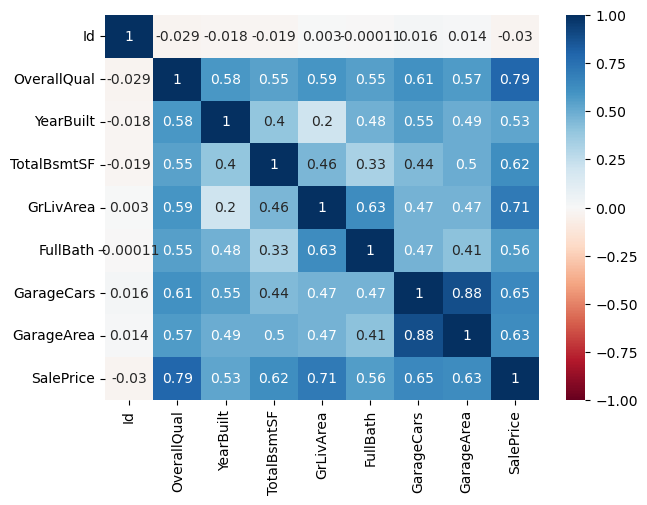

In [145]:
#correlation plot
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),vmax=1,vmin=-1,cmap='RdBu',annot=True)

In [146]:
#pd.set_option('display.max_columns',None)  to see all the column in the dataset

In [147]:
data.corr()['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
OverallQual    0.791478
GrLivArea      0.709503
GarageCars     0.647676
GarageArea     0.627264
TotalBsmtSF    0.619852
FullBath       0.562269
YearBuilt      0.528006
Id            -0.029967
Name: SalePrice, dtype: float64

In [148]:
# lets remove id as it makes no sense in the data

In [149]:
data.head(2)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [150]:
data.drop(columns='Id',axis = 1,inplace = True)

In [151]:
data.head(2)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500


In [152]:
# del data['ID']  alternative way

# univariate Analysis on the data

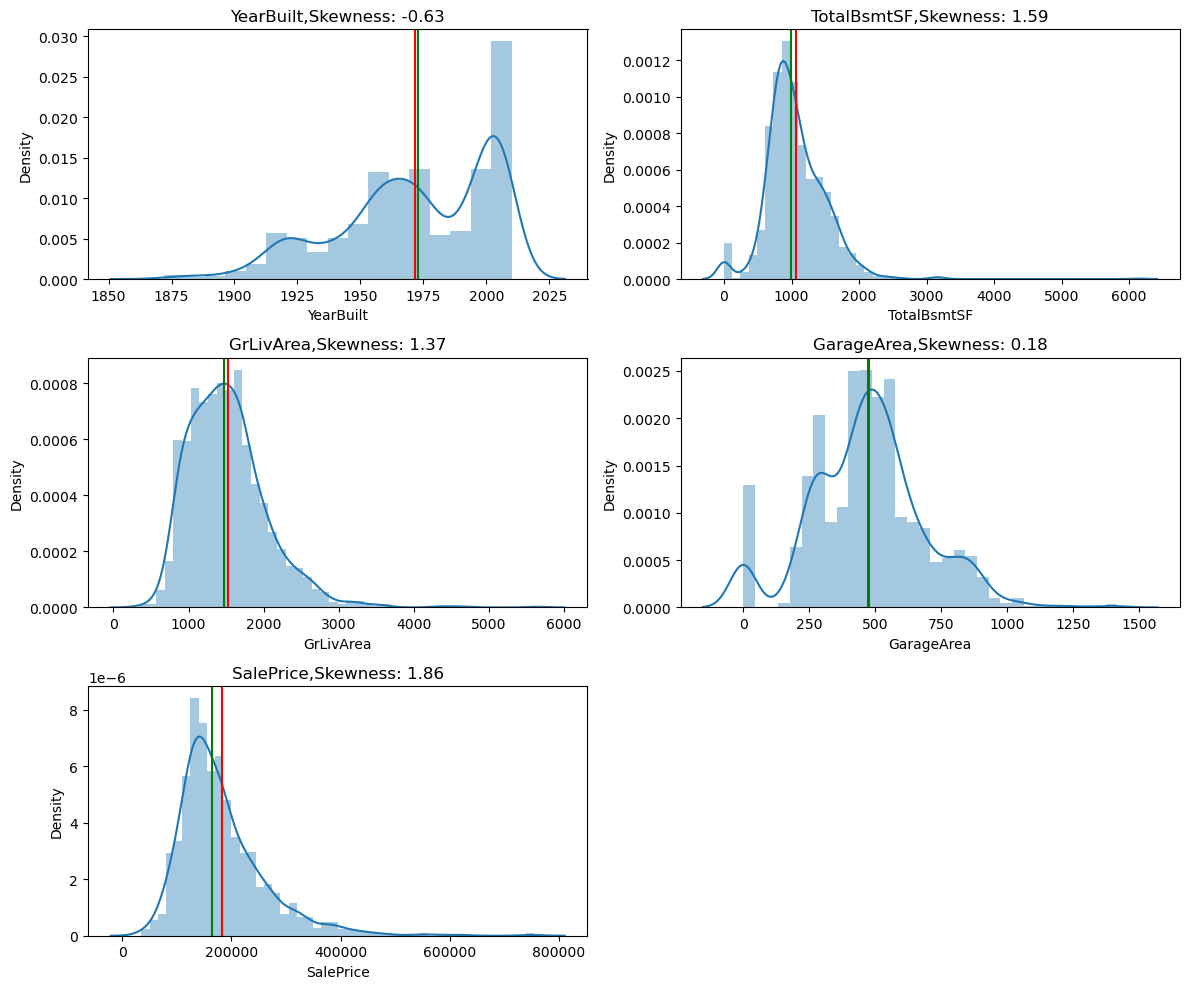

In [153]:
# number columns
plt.figure(figsize=(12,10))
t=1
for i in num_cols:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {round(data[i].skew(),2)}')
    sns.distplot(data[i])
    plt.axvline(data[i].mean(),color='r')
    plt.axvline(data[i].median(),color='g')
    t+=1
plt.tight_layout()
plt.show()

In [154]:
# inference 1 : the distribution of yearbuilt shows most of the properties are recent
# 2 - most of the properties have total basement area between 500 to 1200 sqft and it is right skewed
# 3 - most of the properties have ground living area between 1000-2000 sqft area and it is also right skewed
# 4 - most of the properties has garage area between 400 to 600 sqft and it is approx normal 
#5 - most of the properties has sale price less than 200k dollars and it is right skewed 

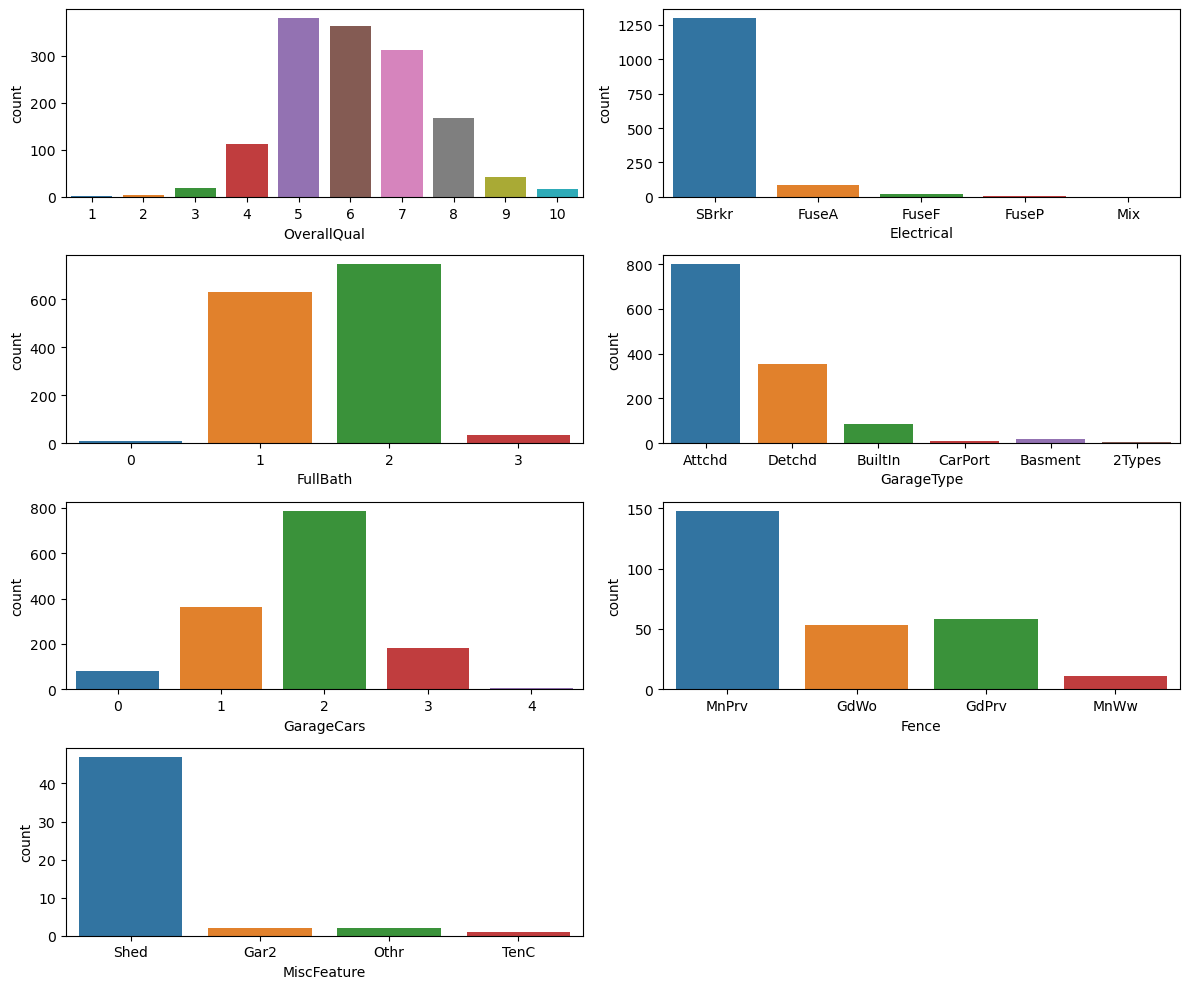

In [155]:
# categories columns
plt.figure(figsize=(12,10))
t=1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data= data,x=i)
    t+=1
plt.tight_layout()
plt.show()

In [156]:
# inference 1: most of the properties they have built between 5 to 7
#2 most of the property have sdrkr electrical work 
#3 maximum properties have either one or two bathrooms
#4 maximum properties have attached or detheched garage type
#5 most of the garages can park two cars
#6 most of the fencing work is Mnprv
#7 most of the miscfeature is shed

# bivariate analysis

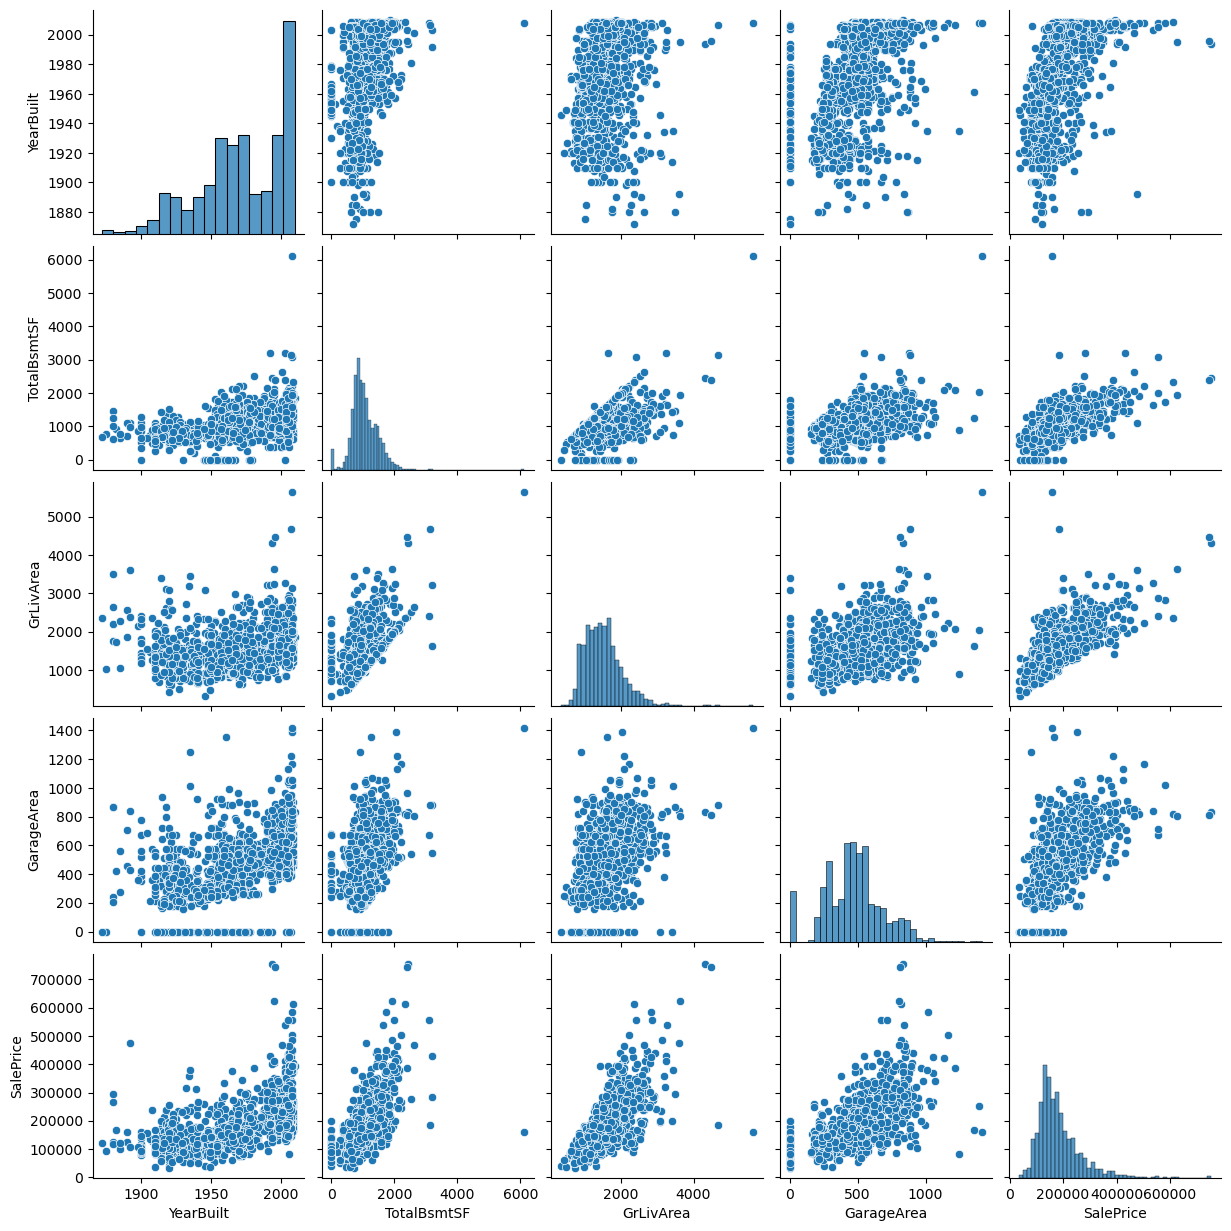

In [157]:
# number vs. number 
sns.pairplot(data[num_cols])

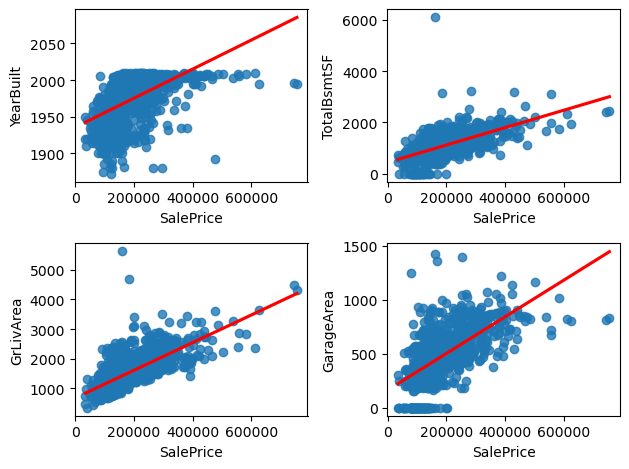

In [158]:
t=1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

In [159]:
#number vs. category

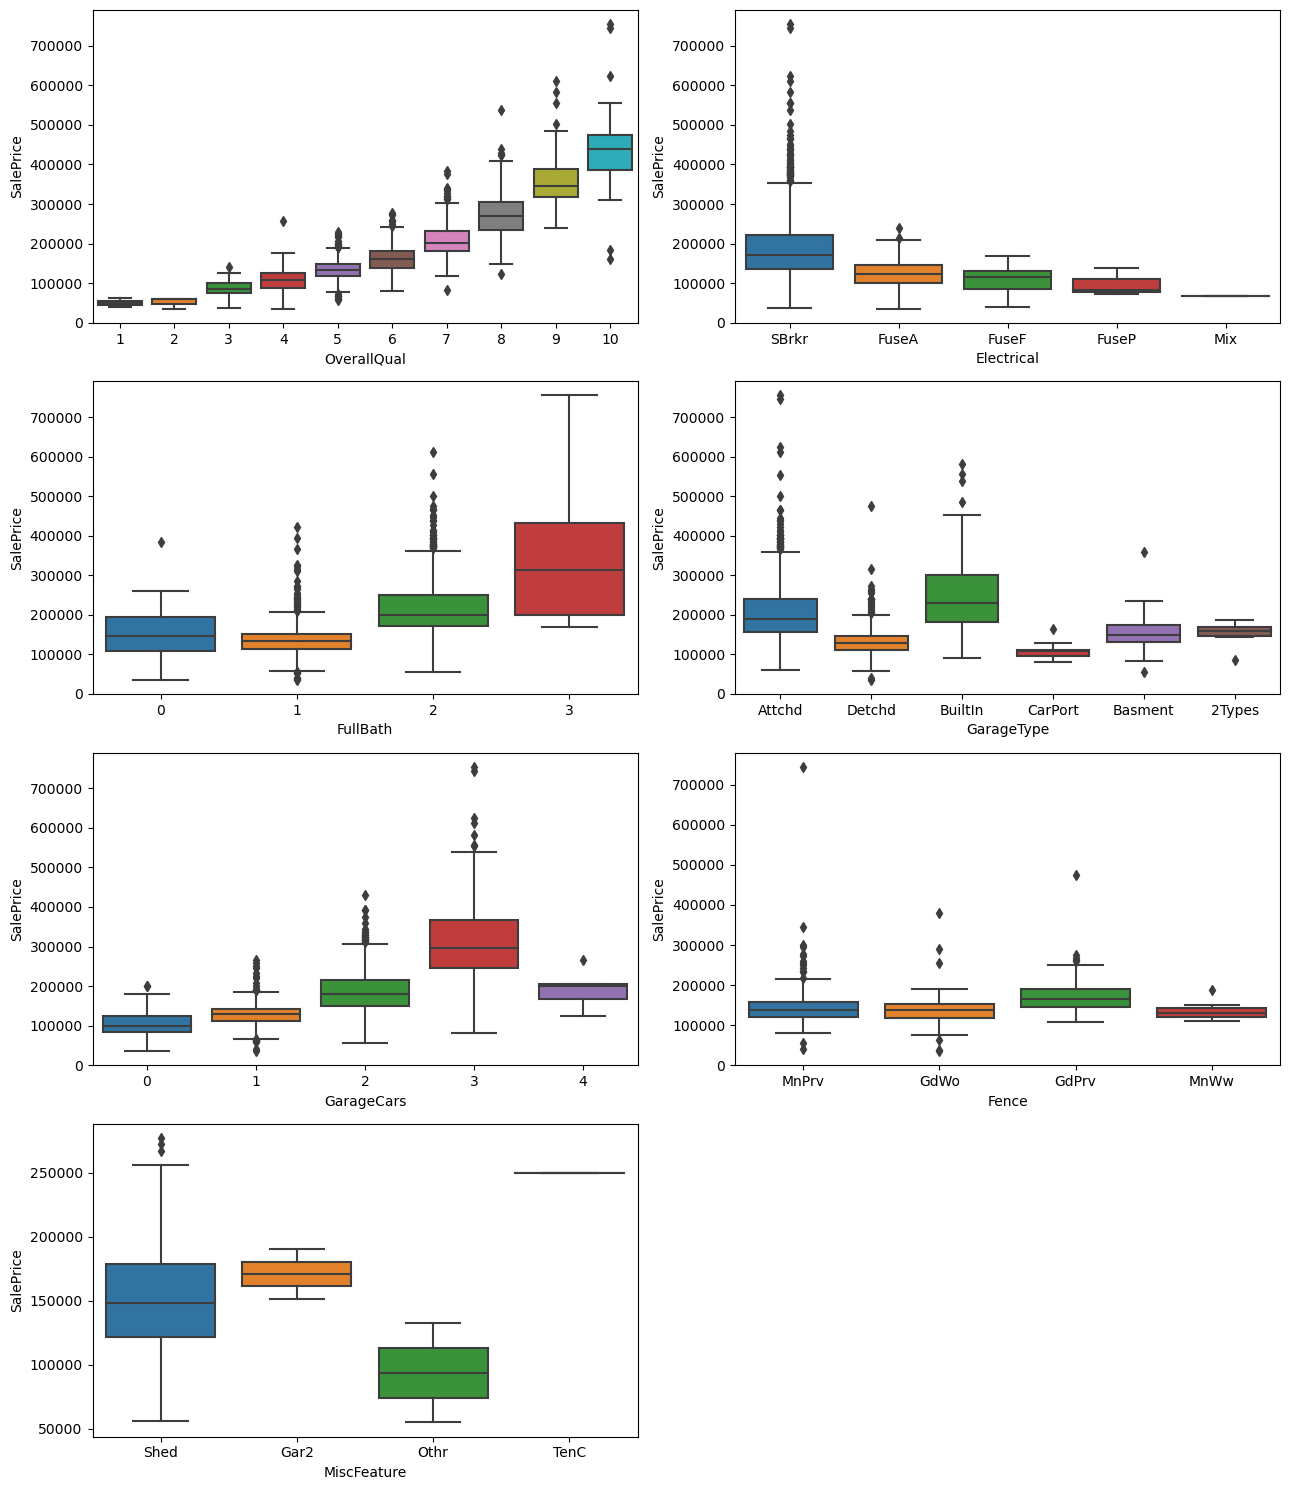

In [160]:
plt.figure(figsize=(13,15))
t= 1
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=data,x=i,y='SalePrice')
    t+=1
plt.tight_layout()
plt.show()

In [161]:
#inference 1 : as overall quality increases the sale price increases 
#2 sbrkr category in electrical has higher sale price than other categories
# as the bathroom increases the sale price increases with 3 bathroom has higher price
#4 - builtin and attached has higher sale price wherein builtin has higher sale price than attached
#5- garage where we can park 3 cars have higher sale price


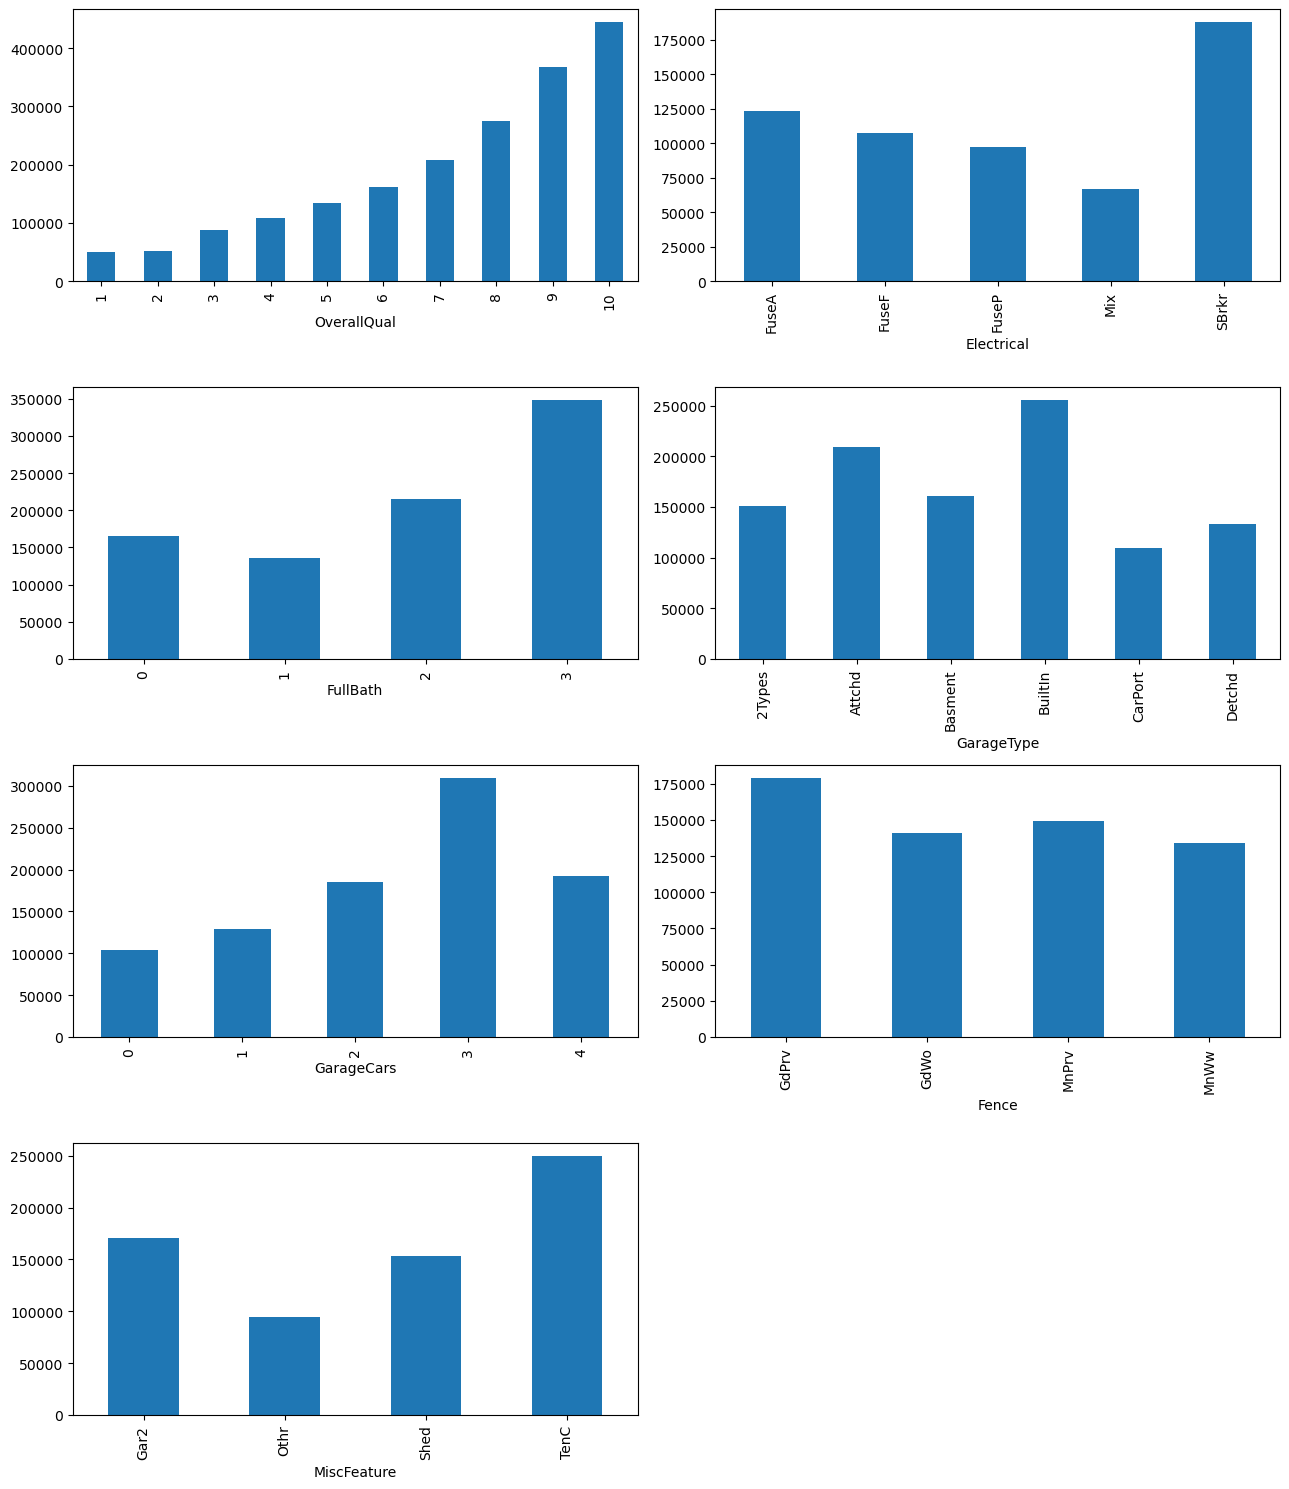

In [162]:
# to check the average price in each category
plt.figure(figsize=(13,15))
t= 1
for i in cat_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    
    t+=1
plt.tight_layout()
plt.show()

## statistical analysis

#### KEY INFERENCES 
* yearBuilt, grlivArea, TotalBsmtSF and GarageArea are related to the sale price
* BuiltQual, Electrical, FullBath, GarageType an GarageCars are also affecting the SalePrice

In [163]:
# Lets explore yearbuilt and saleprice statistically
#both numbers use pearson's correlation, spearman 


In [164]:
import scipy.stats as stats

In [165]:
#assumptions: Data must be normal

#Ho: The data is normal
#Ha: The data is not normal
print(stats.shapiro(data['SalePrice']))
print(stats.shapiro(data['YearBuilt']))

#Since both pvalues are less than 0.05 we have to reject ho. So we can go with  spearman;s correlation test (non parametric)


ShapiroResult(statistic=0.8717886209487915, pvalue=1.371634693338205e-32)
ShapiroResult(statistic=0.9247534275054932, pvalue=4.7268936789807727e-26)


In [166]:
# Spearman's correlation test
# Ho: Samples are independent
# Ha: Samples are dependent

print(stats.spearmanr(data['SalePrice'],data['YearBuilt']))

SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)


In [167]:
for i in num_cols:
    if i != 'SalePrice':
        print(i,stats.spearmanr(data['SalePrice'],data[i]))

YearBuilt SignificanceResult(statistic=0.6554334366989801, pvalue=7.731685842769625e-175)
TotalBsmtSF SignificanceResult(statistic=0.610789140940605, pvalue=9.424659979319682e-146)
GrLivArea SignificanceResult(statistic=0.7352976571006725, pvalue=1.7737764527778764e-241)
GarageArea SignificanceResult(statistic=0.6598555665561451, pvalue=5.419048779956526e-178)


In [168]:
# kruskal wallis for num and categories
# proove statistically the affect of garagetype on Saleprice

In [169]:
data['GarageType'].unique()

array(['Attchd', 'Detchd', nan, 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [170]:
s1 = data[data['GarageType']=='Attchd']['SalePrice']
s2 = data[data['GarageType']=='Detchd']['SalePrice']
s3 = data[data['GarageType']=='BuiltIn']['SalePrice']
s4 = data[data['GarageType']=='CarPort']['SalePrice']
s5 = data[data['GarageType']=='Basment']['SalePrice']
s6 = data[data['GarageType']=='2Types']['SalePrice']
print(stats.kruskal(s1,s2,s3,s4,s5,s6))
#kriskal is a non parametric alternative of anova

KruskalResult(statistic=440.6623751087267, pvalue=5.0735517569761e-93)


In [171]:
#it is statistically proven garagetype is effecting the saleprice

## Data Preprocessing

### feature Engineering

In [172]:
# we will create a new column age by assuming the data was collected
# in 2010. We will subtract 2010 and yearbuilt.

data['Age'] = 2010-data['YearBuilt']
data.head(2)

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


In [173]:
data.drop(columns='YearBuilt',axis=1,inplace=True)

In [174]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34


<Axes: xlabel='SalePrice', ylabel='Age'>

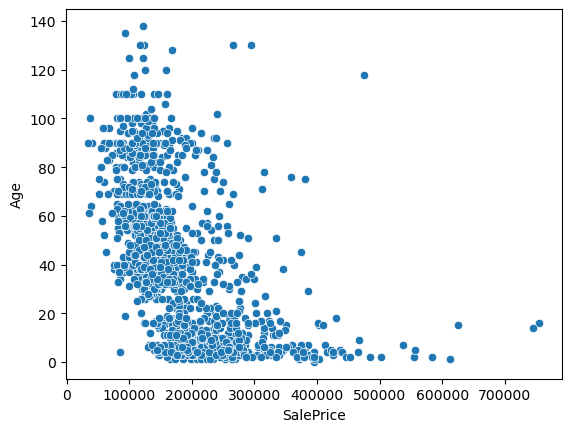

In [175]:
sns.scatterplot(x= data['SalePrice'],y = data['Age'])

In [176]:
data[['SalePrice','Age']].corr()

,SalePrice,Age
SalePrice,1.000000,-0.528006
Age,-0.528006,1.000000


## Missing Values

In [177]:
missing_pec = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)

In [178]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [179]:
# closest fit  -- finding similar pattern
# central value imputation
# Deletion (lot of data is missing in a column or very few rows in the data 
# has missing columns)

In [180]:
# lets treat the missing value in electrical
data[data['Electrical'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1339,5,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500,4


In [181]:
#Central value imputation
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [182]:
# missing value in GarageType
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
37,4,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000,55
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70
1407,5,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000,40
1408,5,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000,36
1411,5,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500,4


In [183]:
# lets impute te missing values where garage area and garage cars are zero with new category no garage



data['GarageType'] = np.where((data['GarageArea']==0)&(data['GarageCars']==0),'NoGarage',data['GarageType'])

In [184]:
data[data['GarageType'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
8,5,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000,71
22,5,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000,42
26,5,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500,53
39,5,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000,51
47,5,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000,44
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500,68
1317,5,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000,44
1357,5,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000,60
1387,5,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000,70


In [185]:
# since mode of GarageType where garageCars is 1 is 'Detchd'
data['GarageType'].fillna('Detchd',inplace=True
                         )

In [186]:
data.groupby(data['GarageCars'])['GarageType'].describe()

,count,unique,top,freq
GarageCars,,,,
0,81,1,NoGarage,81
1,364,5,Detchd,240
2,787,6,Attchd,556
3,181,4,Attchd,138
4,5,3,Detchd,3


In [187]:
missing_pec[missing_pec>0]

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
dtype: float64

In [188]:
data[data['Fence'].isnull()]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500,7
1,6,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500,34
2,7,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500,9
3,7,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000,95
4,8,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1411,5,1140,SBrkr,1140,1,NoGarage,0,0,NaN,NaN,84500,4
1412,7,1221,SBrkr,1221,2,Attchd,2,400,NaN,NaN,185000,6
1413,6,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000,11
1416,5,1078,FuseA,1078,1,Detchd,1,240,NaN,NaN,142125,60


In [189]:
# Lets treat missing values in Fence
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [190]:
# Lets bin this data into 0-Fence not present , 1-Fence present

# before deletion we use binning

In [191]:
data['Fence'] = np.where(data['Fence'].isnull(),0,1)

In [192]:
data['Fence'].value_counts()

0    1148
1     270
Name: Fence, dtype: int64

In [193]:
s1 = data[data['Fence']==0]['SalePrice']
s2 = data[data['Fence']==1]['SalePrice']

In [194]:
#ho: the samples are independent
#ha: the samples are dependent
stats.mannwhitneyu(s1,s2)

#fence is effecting the saleprice

MannwhitneyuResult(statistic=201362.0, pvalue=1.842459050609252e-14)

<Axes: xlabel='Fence', ylabel='SalePrice'>

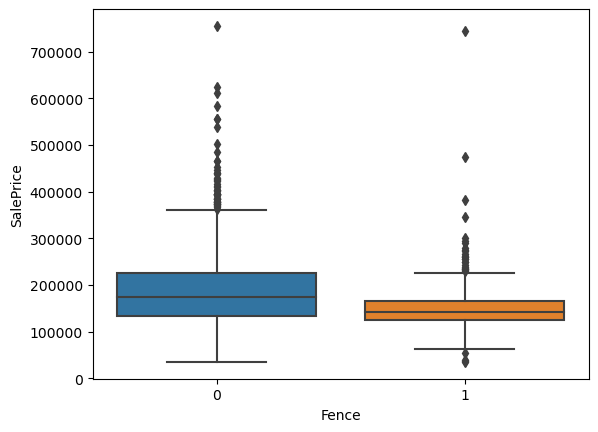

In [195]:
sns.boxplot(x=data['Fence'],y=data['SalePrice'])

In [196]:
# Lets treat missing values in Miscfeature
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [197]:
data['MiscFeature'] = np.where(data['MiscFeature'].isnull(),0,1)

In [198]:
data['MiscFeature'].value_counts()

0    1366
1      52
Name: MiscFeature, dtype: int64

In [199]:
# lets validate this statically
#ho: The samples are independent
#ha: The samples ae dependent

stats.mannwhitneyu(data[data['MiscFeature']==0]['SalePrice'],
                  data[data['MiscFeature']==1]['SalePrice'])

MannwhitneyuResult(statistic=42639.5, pvalue=0.013980740442174018)

<Axes: xlabel='MiscFeature'>

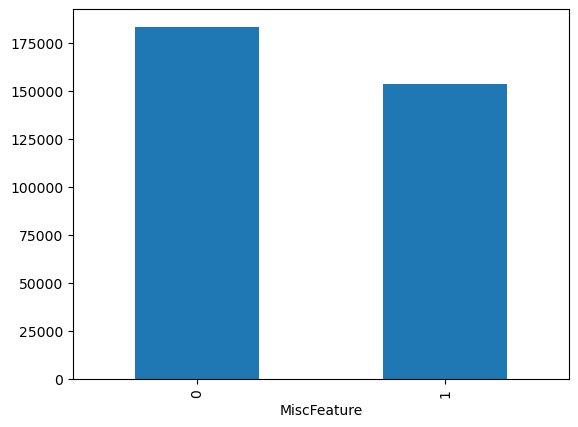

In [200]:
data.groupby(by='MiscFeature')['SalePrice'].mean().plot(kind='bar')

In [201]:
data.isnull().sum()

OverallQual    0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
Fence          0
MiscFeature    0
SalePrice      0
Age            0
dtype: int64

### Outlier Treatment

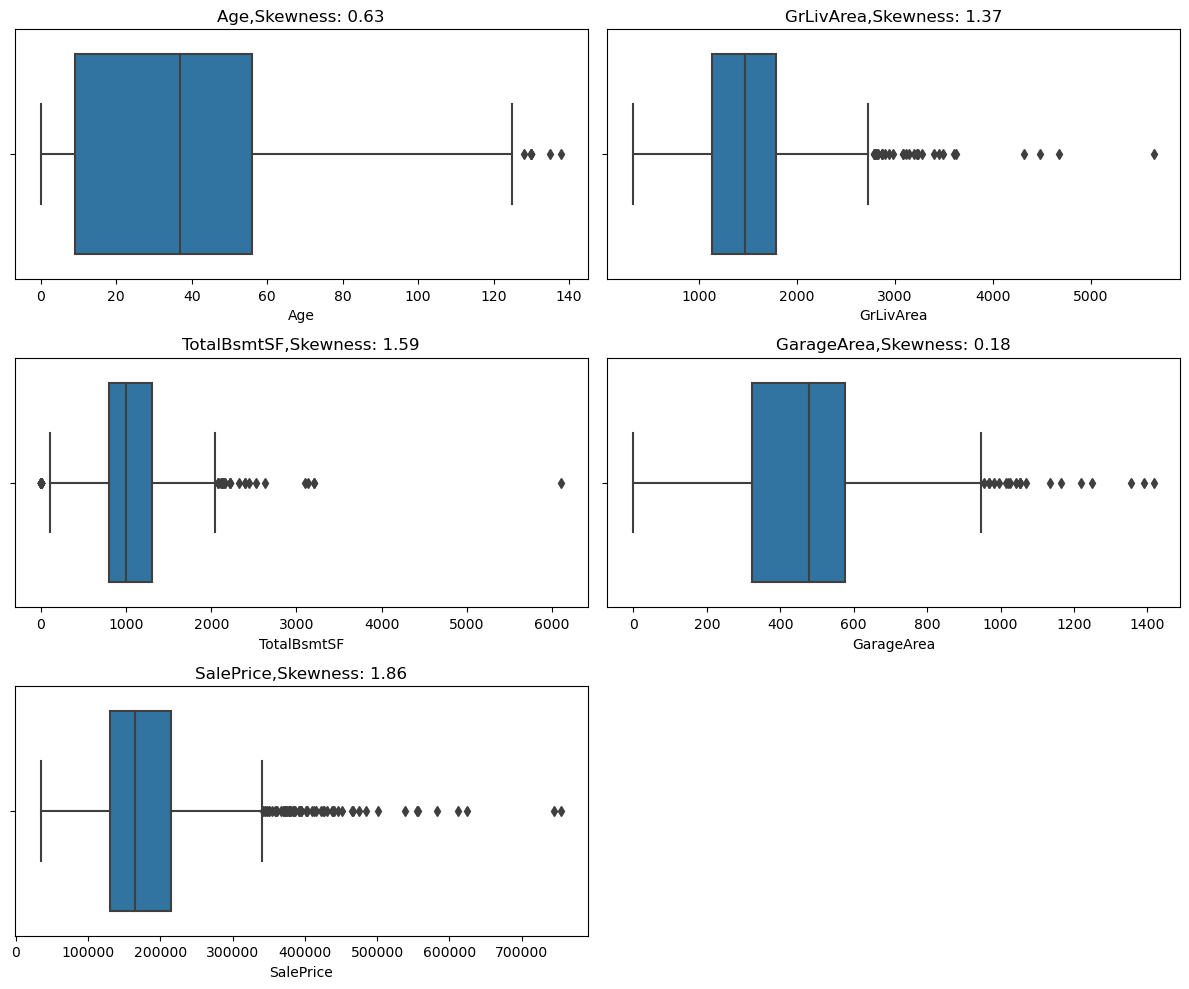

In [202]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

In [203]:
data[data['TotalBsmtSF']>6000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [204]:
data[data['GrLivArea']>5000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
1260,10,6110,SBrkr,5642,2,Attchd,2,1418,0,0,160000,2


In [205]:
data[data['SalePrice']>700000]

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
665,10,2444,SBrkr,4316,3,Attchd,3,832,0,0,755000,16
1147,10,2396,SBrkr,4476,3,Attchd,3,813,1,0,745000,14


In [206]:
data.drop(index=[1260],inplace=True)

In [207]:
# capping (cap the outliers)
# remove (remove the outliers)

In [208]:
# lets cap the outliers to 99th percentile in GarageArea,
# TotalbsmtSF, GrLivArea

for i in ['GarageArea','TotalBsmtSF','GrLivArea']:
    ul = np.percentile(data[i],99)
    data[i] = np.where(data[i]>ul,ul,data[i])

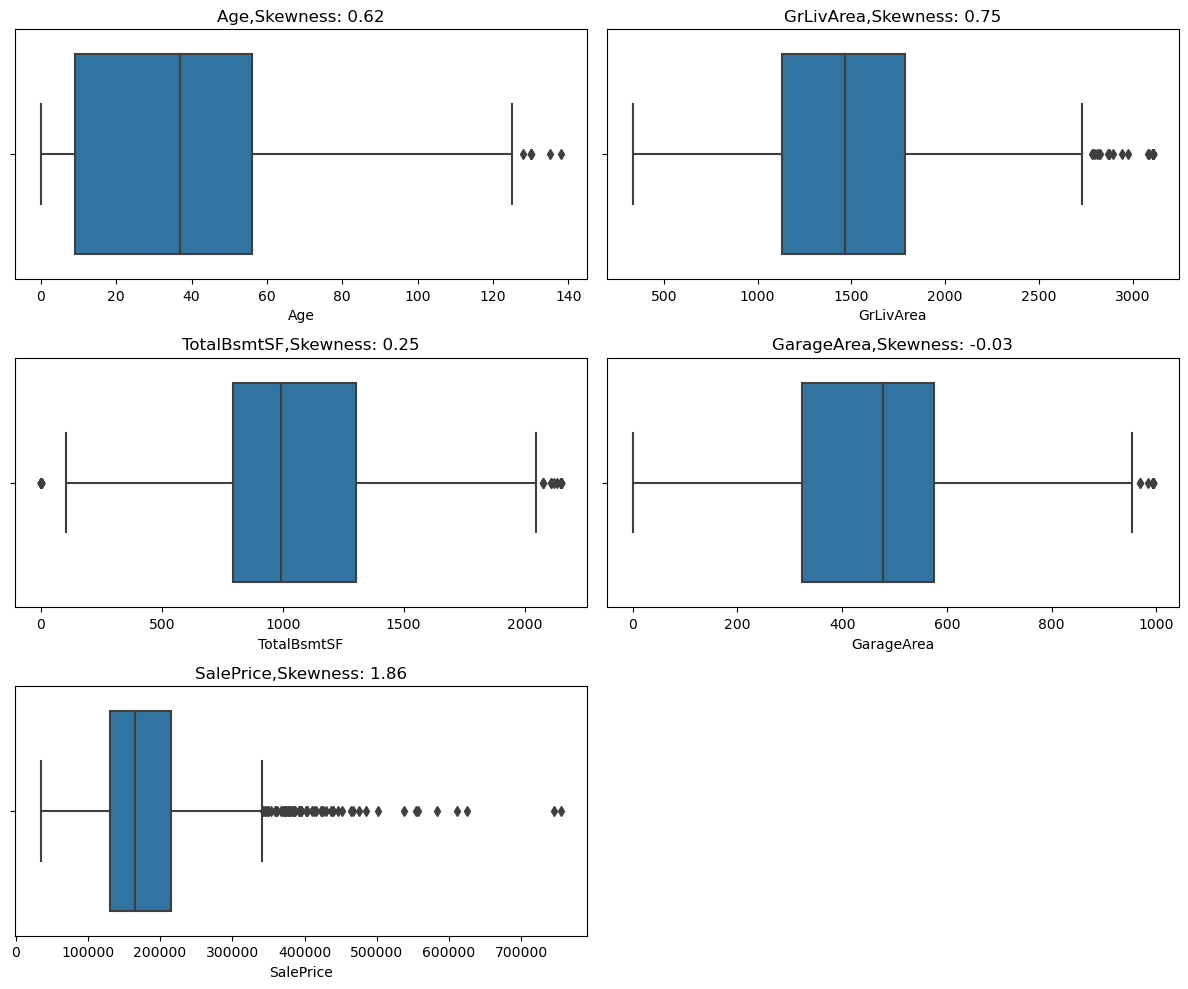

In [209]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea','SalePrice']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {round(data[i].skew(),2)}')
    sns.boxplot(x=data[i],orient='h')
    t+=1
plt.tight_layout()
plt.show()

## Feature Scaling

In [210]:
# minmax scaling  >> min-max scaling
# standard scaling  > -infinity to infinity range h
# Robust scaling >> x = (x-q1)/IQR  robust to outlier it can be neg or positive not effected by outliers

In [211]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [212]:
mm = MinMaxScaler()
ss = StandardScaler()

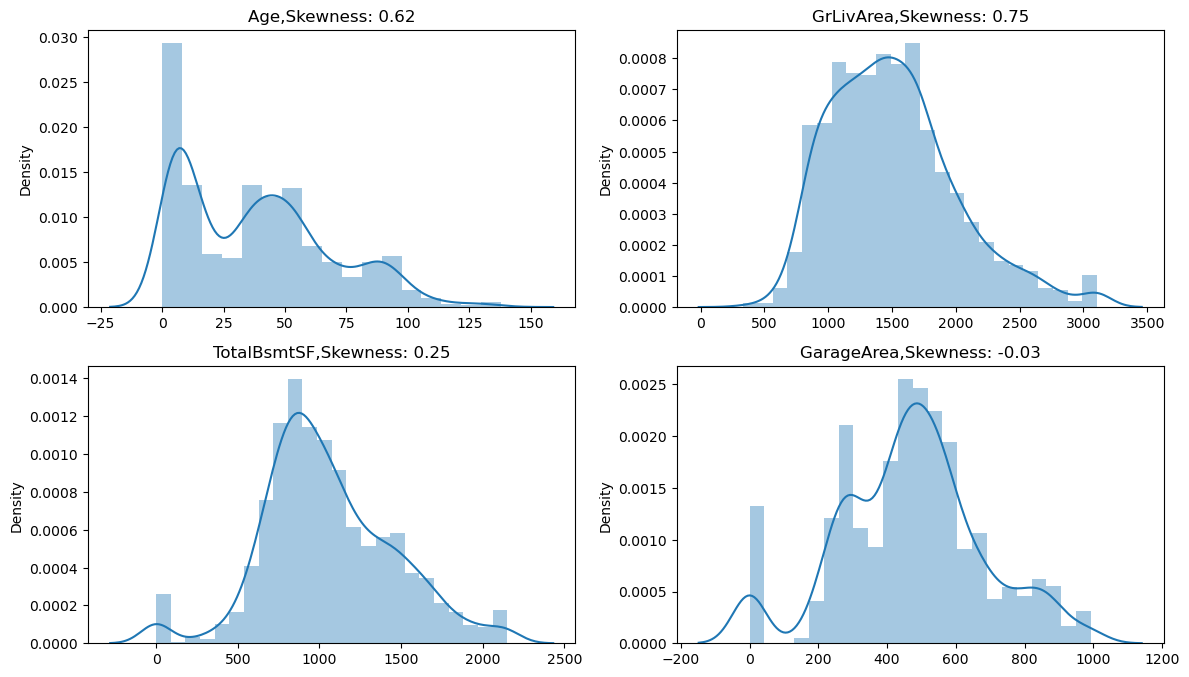

In [213]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [214]:
ss.fit_transform(data[['Age','GrLivArea','TotalBsmtSF','GarageArea']])

array([[-1.04579604,  0.39934974, -0.49386754,  0.36787539],
       [-0.14725552, -0.50383544,  0.51949587, -0.05027793],
       [-0.97923749,  0.55256865, -0.33412552,  0.65297992],
       ...,
       [ 1.01751923,  1.66945389,  0.24493928, -1.03864031],
       [ 0.71800572, -0.8747865 ,  0.06023758, -1.09566121],
       [ 0.21881654, -0.51593167,  0.50452006, -0.92459849]])

In [215]:
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    scale = MinMaxScaler()
    data[i]=scale.fit_transform(pd.DataFrame(data[i]))

In [216]:
data.head(2)

,OverallQual,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice,Age
0,7,0.398088,SBrkr,0.496063,2,Attchd,2,0.551819,0,0,208500,0.050725
1,6,0.586900,SBrkr,0.334554,2,Attchd,2,0.463205,0,0,181500,0.246377


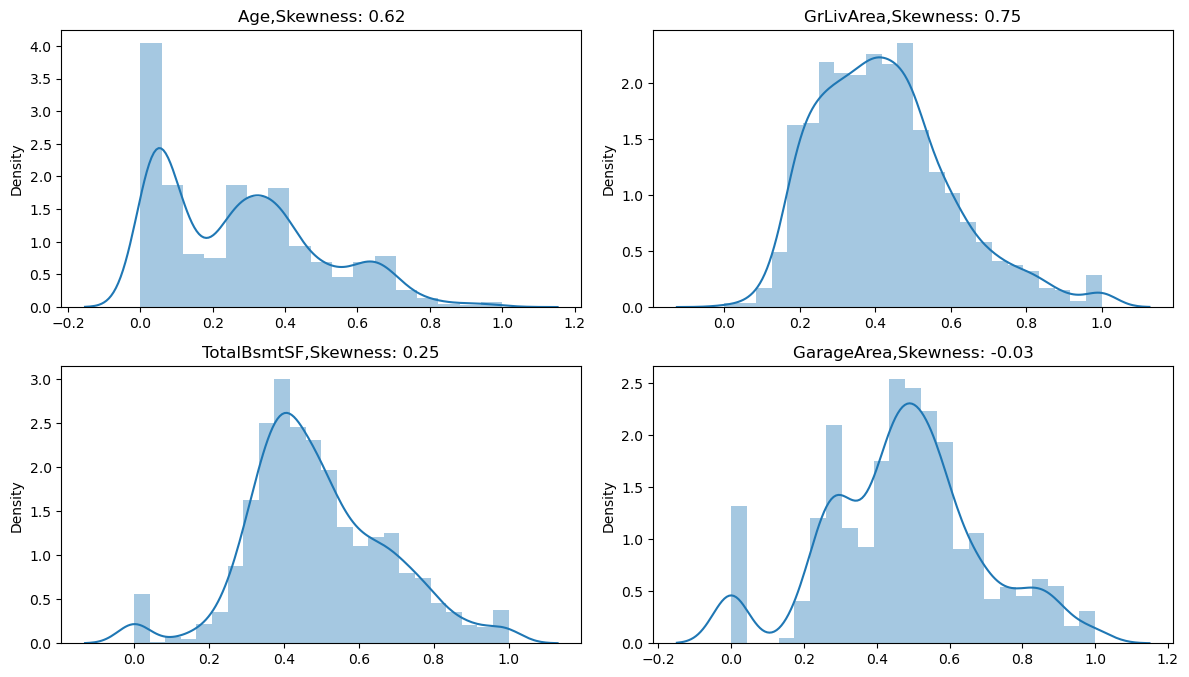

In [217]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {round(data[i].skew(),2)}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

## Feature Transformation

In [218]:
# To reduce the skewness or make the normal we do feature transformation
# sqrt transformation
# cuberoot Transformation
#log tranformation
# boxcox transformation
# yeojohnson tranformation

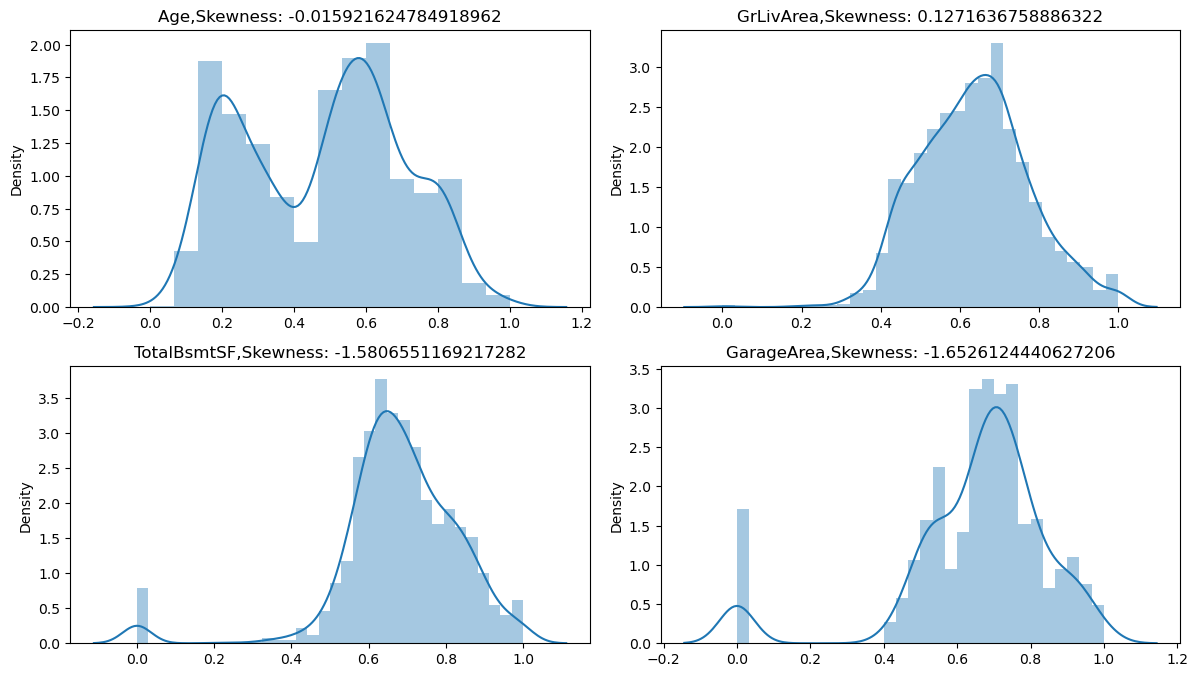

In [219]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {np.sqrt(data[i]).skew()}')
    sns.distplot(x=np.sqrt(data[i]))
    t+=1
plt.tight_layout()
plt.show()

In [220]:
np.cbrt(-5)

-1.709975946676697

OverflowError: cannot convert float infinity to integer

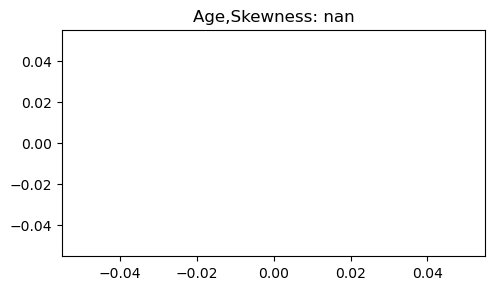

In [221]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {np.log(data[i]).skew()}')
    sns.distplot(x=np.log(data[i]))
    t+=1
plt.tight_layout()
plt.show()

# error because data has negative value

In [228]:
from sklearn.preprocessing import PowerTransformer

In [229]:
yj = PowerTransformer(standardize=False)

In [230]:
for i in['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    
    data[i]=yj.fit_tranform(pd.DataFrame(data[i]))
    


AttributeError: 'PowerTransformer' object has no attribute 'fit_tranform'

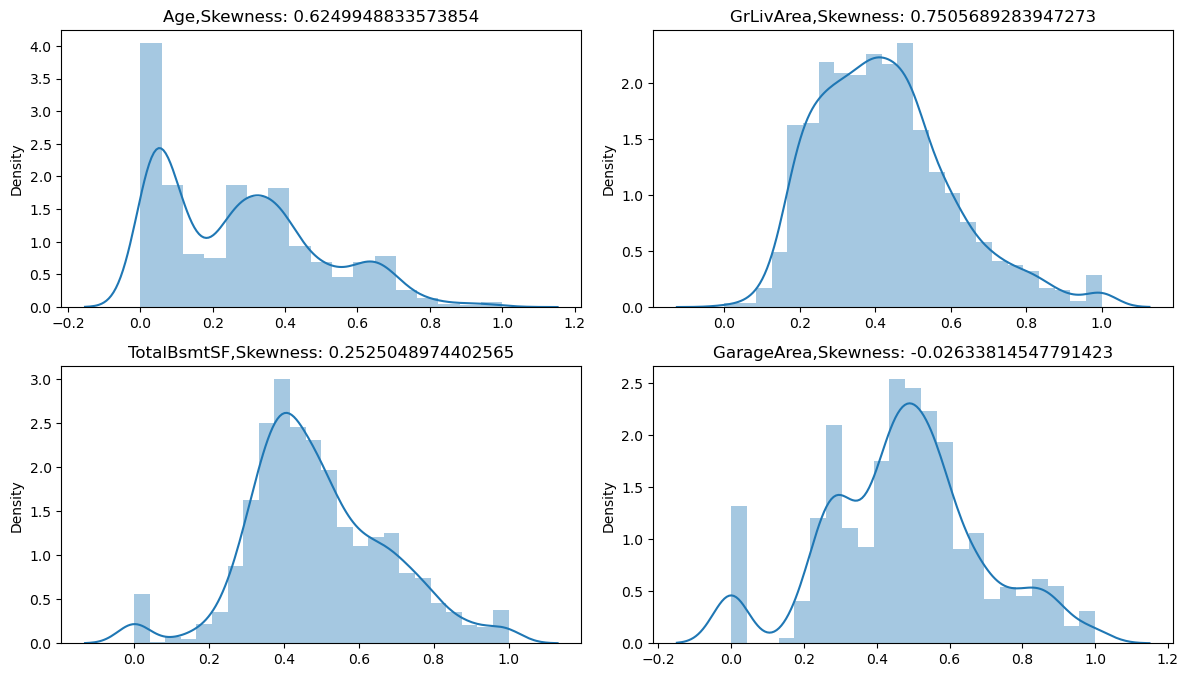

In [231]:
plt.figure(figsize=(12,10))
t=1
for i in ['Age','GrLivArea','TotalBsmtSF','GarageArea']:
    plt.subplot(3,2,t)
    plt.title(f'{i},Skewness: {(data[i]).skew()}')
    sns.distplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

In [232]:
# target encoding

In [ ]:
data['GarageType'] = 